# 强化学习笔记：最优策略、值函数与贝尔曼最优方程

# 1. 前言

上一篇介绍了策略、值函数和贝尔曼方程。强化问题的求解就是学习一个能够取得长期（或总体）回报最大化的策略。

本篇我们接着介绍最优策略、最优值函数以及贝尔曼最优方程，最优策略代表能够得到最优值函数解的策略，求解贝尔曼最优方程可以得到最优策略。

本文中公式编号(*,*)中第2部分表示对应公式在原书中的编号（如果在原书中有的话）。


# 2. 最优策略、值函数
对于有限马尔科夫决策过程，我们可以对最优策略给出一个精确的定义。两个策略基于它们的值函数进行优劣排序：$$\pi' \geq \pi \Leftrightarrow v'_\pi(s) \geq v_\pi(s), \; \forall s \in \mathcal{S} \qquad\cdots(1)$$

拥有最大值函数的策略就被称为最优策略(optimal policy)，可能有多个最优策略，统称为$\pi_*$,它们拥有相同的最优的状态值函数，如下所示: $$v_*(s) \doteq \max\limits_{\pi}v_\pi(s), \; \forall s \in \mathcal{S} \qquad\cdots(2, 3.15)$$

同样，最优策略也拥有相同的最优动作值函数，如下所示：

$$q_*(s,a) \doteq \max\limits_{\pi}q_\pi(s,a), \;\forall s \in \mathcal{S} \ and \ a \in \mathcal{A}(s)  \qquad\cdots(3, 3.16)$$

根据定义，在条件(s,a)
进一步，由Exercise3.13所得的关系我们可以得到：

$$\begin{align} q_\pi(s,a) &= \sum\limits_{s'}\sum\limits_{r}p(s',r|s,a)(r + \gamma v_\pi(s')) \\&= \sum\limits_{s'}\sum\limits_{r}r p(s',r|s,a) + \sum\limits_{s'}\sum\limits_{r}p(s',r|s,a) \gamma v_\pi(s') \\&= \mathbb{E}[R_{t+1}|S_t=s,A_t=a] + \gamma\mathbb{E}[v_\pi(s')|S_t=s,A_t=a] \\&= \mathbb{E}[R_{t+1} + \gamma[v_\pi(s')|S_t=s,A_t=a] \end{align}$$

以上这个关系对于任意的策略都成立，对于最优策略当然成立，因此有：

$$q_*(s,a) = \mathbb{E}[R_{t+1}+\gamma v_*(S_{t+1})|S_t=s,A_t=a] .  \qquad\cdots(4, 3.17)$$

以上推导中需要注意的是，p(s',r|s,a)是与策略无关的，因此$\mathbb{E}[R_{t+1}]$也是与策略无关的。$q_*(s,a)$为$q_{\pi^*}(s,a)$的简记。

# 3. 贝尔曼最优方程

$v_*(s)$是遵循最优策略(记为$\pi_*$)的值函数，当然也必须满足由式(3.14)所表达的状态值函数的贝尔曼方程，即：
$$\begin{align}v_*(s) &\doteq \mathbb{E}_{\pi^*}[G_t|S_t=s] \\&= \mathbb{E}_{\pi^*}[R_{t+1}+ \gamma G_{t+1}|S_t=s] \\&= \sum\limits_{a}{\pi^*}(a|s)\sum\limits_{s'}\sum\limits_{r}p(s',r|s,a)\big[r+\gamma\mathbb{E}_{\pi^*}[G_{t+1}|S_{t+1}=s'] \big] 
\\&= \sum\limits_{a\in \mathcal{A}}{\pi^*}(a|s)\sum\limits_{s'\in \mathcal{S},r\in \mathcal{R}}p(s',r|s,a)\big[r+\gamma v_{\pi^*}(s') \big] \ \forall s\in\mathcal{S}
\quad\cdots(5) \end{align}$$


另一方面，由于它是最优值函数，根据定义它必然等于在状态s下采取行动a，然后遵循最优策略所得到的各个最优动作值函数之中最大的那个，由此可得：

$$\begin{align}
v_*(s) &= \max\limits_{a\in \mathcal{A}(s)} q_{\pi^*}(s,a) \\
&= \max\limits_{a\in \mathcal{A}(s)}\mathbb{E}[R_{t+1}+\gamma v_*(S_{t+1})|S_t=s,A_t=a] \\
&= \max\limits_{a\in \mathcal{A}(s)} \sum\limits_{s',r} p(s',r|s,a)\big[r+\gamma v_{*}(s')\big]\quad\cdots(6, 3.19) 
\end{align} $$

方程(3.19)被称为状态值函数的贝尔曼最优方程(Bellman Optimality Function).


同理，结合(4)和(6)可以写出关于动作值函数的贝尔曼最优方程。

$$\begin{align}
q_*(s,a) &= \mathbb{E}[R_{t+1}+\gamma v_*(S_{t+1})|S_t=s,A_t=a] \\
&= \mathbb{E}[R_{t+1}+\gamma \max\limits_{a'} q_{*}(S_{t+1},a')|S_t=s,A_t=a] \\
&= \sum\limits_{s',r}p(s',r|s,a)(r + \gamma \max\limits_{a'} q_{*}(s',a')|S_t=s,A_t=a)
\qquad\cdots(7, 3.20)
\end{align}$$

以上方程(6)和(7)所对应的backup diagram分别下图左右所示。与先前的求$v_\pi, q_\pi$所用的backup diagram相比，仅仅是追加了表示从各可能分支中选择最大值的表示（弧线、max）
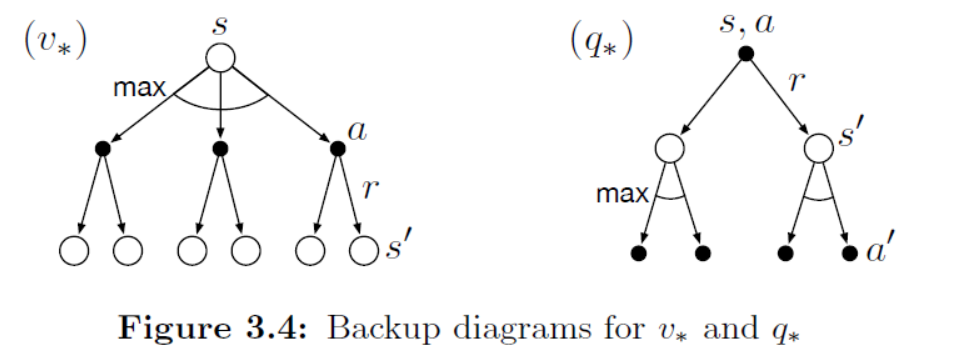

# 4. 贝尔曼最优方程求解

对于有限马尔科夫决策过程，状态值函数贝尔曼最优方程事实上是一个非线性方程组，每个方程对应于一个状态。假定有n个状态，则有n个方程，需要求解n个未知数(未知数即各状态的最优状态值函数)。如果该MDP的动力学函数(dynamics)p已知的话，原则上可以使用很多种非线性方程组求解方法求解该方程组。同样也可以求解关于动作值函数的贝尔曼最优方程。

一旦求得了各状态的最优状态值函数，最优策略的确定就是显而易见的了。

对于每个状态，都有一个或多个行动会得到由贝尔曼最优方程所确定的最大状态值。任何仅给这些动作赋予非零概率的策略都是最优策略（因为只有这些策略有非零概率，所以不管选择谁都会得到最大状态值）。从一个角度来看，任何对状态值函数采取贪婪策略的策略都是最优策略。

贪婪(greedy)这个术语在计算机科学中是表示仅基于局部或者短期甚至即时的考虑来进行选择的策略，而不管这种选择在长期或全局角度可能会导致较差的结果。

$v_*$的优美体现在由于它自身已经蕴含了对长期的考量（because $v_*$ already takes into account the reward consequences of all possible future behavior），因此针对它的贪婪策略（或者说one-step-ahead search，即只看一步。喜欢下棋的人可能更容易直观地理解这一概念，俗话说多算胜，少算不胜，下棋能计算的步数越多当然赢面就越大）就可以导致长期意义上的最优解。

进一步，如果求解了$q_*$会使得最优行动的选择更加容易，甚至都不需要one-step-ahead search，直接选择使得$q_*(s,a)$的动作a即可。这是因为动作值函数有效地把最优长期预期回报体现为one-step-ahead search的结果。基于$q_*(s,a)$进行最优动作选择比基于$v_*(s)$进行最优动作选择更容易，当然不是天上掉馅儿饼，它也有相应的代价: $q_*(s,a)$是关于(s,a)二元组的函数，(s,a)二元组的个数当然远远大于状态数，因此求解$q_*(s,a)$比求解$v_*(s)$需要更多的资源。这个代价所换取的好处就是，基于$q_*(s,a)$进行最优行动选择不需要知道任何未来的状态及其值函数的信息，换句话说，不需要关于环境动力学函数p的任何信息。

# 5. 理想很丰满现实很残酷

虽然上一节我们给出了求解贝尔曼最优方程从而得到最优策略的理论求解思路，嗯，理论上，可以以这种方式求解强化学习问题，如果。。。一些假设条件满足的话，这些假设条件包括（但不限于）：

(1) 环境的动力学函数完全精确已知

(2) 有充分的计算资源

(3) 状态转移满足马尔科夫性

对于我们所感兴趣的实际问题鲜有能满足以上全部条件的，以西洋双陆棋(backgammon)为例，第1和第2条假设都满足，但是这种游戏有$10^20$种状态，即便用最快的计算要解这个规模的贝尔曼最优方程也需要几千年的时间。更不用说围棋，相比于围棋的可能状态数，西洋双陆棋的状态数只是沧海一粟！

所以，以上的求解方法（类似于exhaustive search）只有理论上的意义，实际强化学习求解问题通常都只能以某种近似的形式进行。有许多不同的决策方法(decision-making methods)都可以看作是贝尔曼最优方程的近似求解方法， 比如说，启发式搜索方法(heuristic search methods), 动态规划(dynamic programming)等等。 


参考文献：

[1] Sutton-RLbook-chapter3.6
